# 서포트벡터머신

iris 데이터 분류하기

`scikit-learn`의 `svm` 라이브러리

- `SVC`: 서포트벡터 머신 생성
   - `kernel`: 비선형 데이터에 대해 결정 경계 그리기
   - `C` : 오류를 어느 정도 허용할 것인지 (클수록 하드마진)
   - `gamma`: 결정 경계를 얼마나 유연하게 그을 것인지 (학습 데이터에 대한 민감도: 클수록 구부러진 결정 경계)
   
- `LinearSVC`: 선형 SVM

<br>

**최소화하는 error에 따른 차이**
- linearSCV: 손실함수에서 squared error를 최소화
- svm.SVC(kernel='linear'): regular error를 최소화

In [5]:
# 필요한 라이브러리 불러오기

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from matplotlib import pyplot as plt

In [6]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2, random_state = 30)

print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

120 30
120 30


In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 1. SVM

### 1-1. 모델 적합

In [28]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)

**서포트벡터 확인**

In [38]:
svc.support_vectors_

array([[-0.96028458,  0.52065501, -1.21514914, -0.97239381],
       [-1.69504004, -1.75129412, -1.44451272, -1.23819622],
       [-0.96028458, -1.29690429, -0.4697175 , -0.17498659],
       [ 0.38676711, -1.97848903,  0.39039593,  0.35661823],
       [ 0.14184862, -0.84251447,  0.7344413 ,  0.48951944],
       [-0.59290684, -0.16092973,  0.39039593,  0.35661823],
       [ 0.99906334, -0.16092973,  0.6771004 ,  0.62242064],
       [-1.20520306, -1.52409921, -0.29769481, -0.30788779],
       [ 0.26430787, -0.16092973,  0.61975951,  0.75532185],
       [ 1.61135956, -0.16092973,  1.13582757,  0.48951944],
       [ 0.14184862, -0.16092973,  0.56241861,  0.75532185],
       [-1.20520306, -1.29690429,  0.39039593,  0.62242064],
       [ 0.38676711, -0.61531956,  0.56241861,  0.75532185],
       [ 0.26430787, -1.06970938,  1.02114578,  0.22371703],
       [ 0.14184862, -1.97848903,  0.6771004 ,  0.35661823]])

### 1-2. 예측

In [29]:
print(y_pred_train)
print(y_pred_test)

[2 1 2 2 2 2 1 2 1 2 2 2 0 2 2 1 1 1 1 1 0 1 2 1 0 2 0 1 1 1 0 1 0 1 0 2 2
 2 0 2 2 2 0 0 1 0 2 2 2 2 0 1 0 1 1 1 2 0 1 0 1 2 1 0 0 0 2 2 0 1 1 1 0 0
 0 0 2 0 2 0 0 2 2 2 0 2 1 1 2 1 1 1 1 2 0 1 0 1 0 0 0 2 1 0 0 1 2 2 2 2 0
 1 2 0 2 1 2 2 0 0]
[0 0 0 2 1 1 2 2 1 2 0 2 1 1 0 1 0 0 0 2 1 0 0 0 2 2 2 2 0 1]


### 1-3. 성능평가

In [30]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.975
0.9


### 1-4. C 변화에 따른 성능평가

In [31]:
c_list = [0.01, 0.05, 0.1, 0.5, 1, 10]
accuracy = pd.DataFrame(columns = ['accuracy'])

for c in c_list:
    svc = SVC(kernel='linear', C = c)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    accuracy.loc[c] = accuracy_score(y_test, y_pred)

accuracy.index.name = 'c'
accuracy.columns.name = 'performance'
accuracy

performance,accuracy
c,
0.01,0.933333
0.05,0.966667
0.10,0.966667
0.50,0.933333
1.00,0.900000
10.00,0.933333


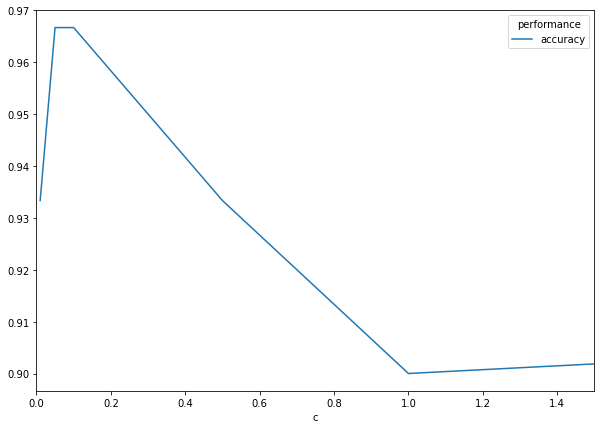

In [32]:
accuracy.plot(figsize=(10, 7))
plt.xlim(0, 1.5)
plt.show()

---

## 2. kernal SVM

kernal SVM 모델을 적합해보고 정확도를 비교해보자.

### 2-1. Linear SVM

In [33]:
svm_linear = LinearSVC(C=1, max_iter=10000)
svm_linear.fit(X_train, y_train)
y_pred = svm_linear.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9333333333333333


### 2-2. 가우시안 커널 SVM

Radial Basis Function

In [36]:
svm_rbf = SVC(kernel='rbf', gamma=0.7, C=1, max_iter=10000)
svm_rbf.fit(X_train, y_train)
y_pred = svm_rbf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9


### 2-3. 다항 커널 SVM

Polynomial

In [37]:
svm_poly = SVC(kernel='poly', degree=3, gamma='auto', C=1)
svm_poly.fit(X_train, y_train)
y_pred = svm_poly.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9333333333333333
